<a href="https://colab.research.google.com/github/tma29/Adafruit_SSD1306/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tiffany Ma 
Homework 5 ECE523 
Due: April 30, 2021

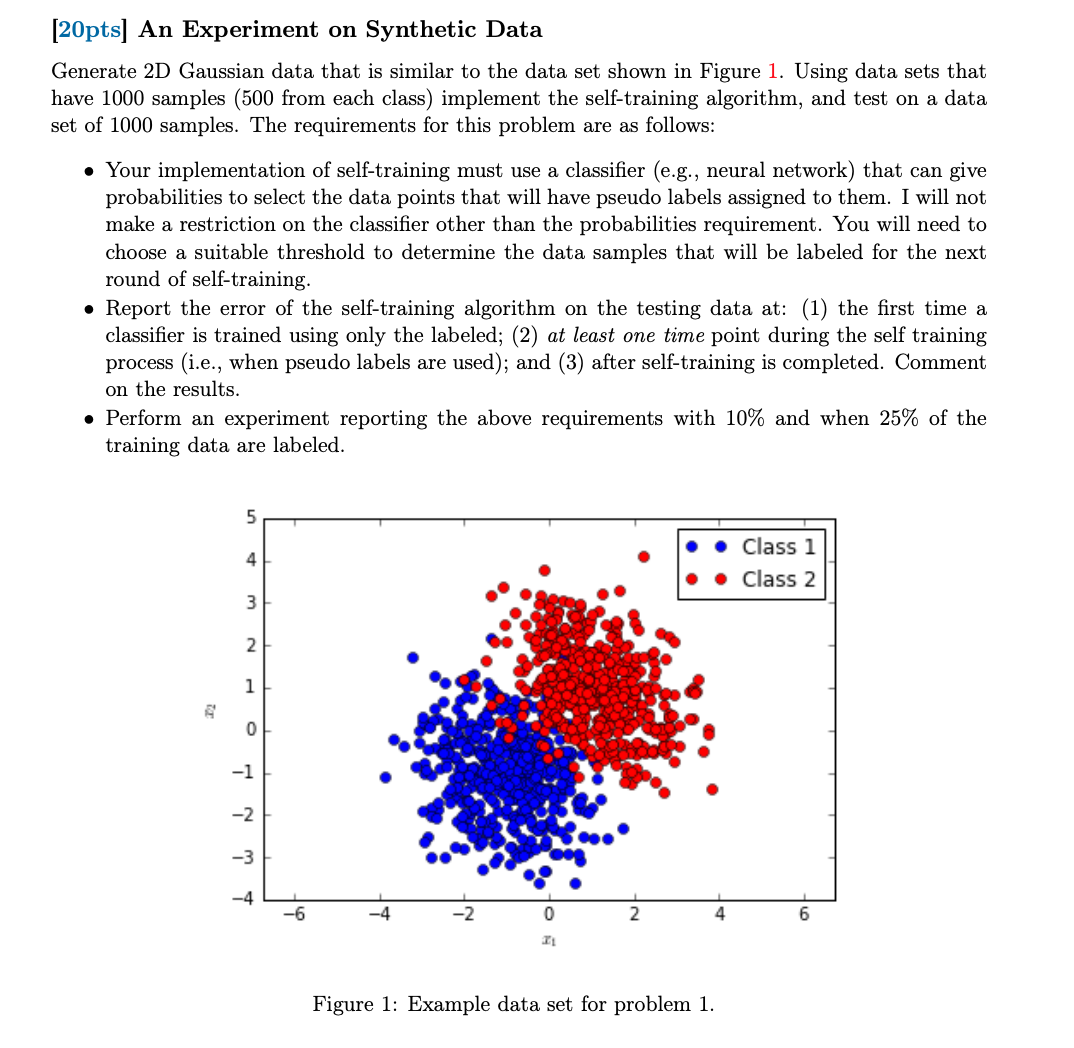

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

import numpy as np
from pylab import rcParams
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale # for scaling the data
import sklearn.metrics as sm # for evaluating the model
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture

#trying to analyze and display the data in the spreedsheet 
red_df = pd.read_csv("wine-quality-red.csv",sep=';')
red_df.shape[1]
red_df.info()
red_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 1 columns):
 #   Column                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                   --------------  ----- 
 0   -0.528194,0.961576,-1.39104,-0.453077,-0.24363,-0.466047,-0.379014,0.5581,1.28824,-0.579025,-0.959946,2  1598 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


,"-0.528194,0.961576,-1.39104,-0.453077,-0.24363,-0.466047,-0.379014,0.5581,1.28824,-0.579025,-0.959946,2"
count,1598
unique,1359
top,"-0.643065,0.933652,-0.72369,-0.382151,-0.24363..."
freq,4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
red_df = pd.read_csv("wine-quality-red.csv",sep=';')
print("Dimensionality of dataset:")
print(red_df.shape)
red_df.head()

X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

encoder = LabelEncoder() 
binary_encoded_y = pd.Series(encoder.fit_transform(y))

#split data into training and test sets 
train_X, test_X, train_y, test_y = train_test_split(X, binary_encoded_y, random_state=1)

#using AdaBoost classifier to self-train the data
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=500
)
classifier.fit(train_X, train_y)

predictions = classifier.predict(test_X)

print("Confusion matrix:")
confusion_matrix(test_y, predictions)


Dimensionality of dataset:
(1598, 1)
Confusion matrix:


array([[18,  0,  0],
       [ 1, 15,  1],
       [ 0,  0, 10]])

In [ ]:
#Look at naming format of columns since data is unlabeled
red_df.head()
df.columns

Index(['0.55397', '-1.20646', '0.586295', '-1.38024', '-0.836648', '0.452343',
       '0.717382', '7'],
      dtype='object')

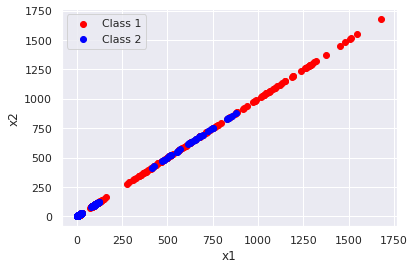

In [ ]:
#y = data['0.55397']  # tried to split off classifications from a column
#X = data.loc[:, object:] # Split off at some integer
#df.loc[[]]

#Two different scatter series for two different clases
plt.scatter(X_train, X_train, label='Class 1', c='red')
plt.scatter(X_test, X_test, label='Class 2', c='blue')

#Label graph
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

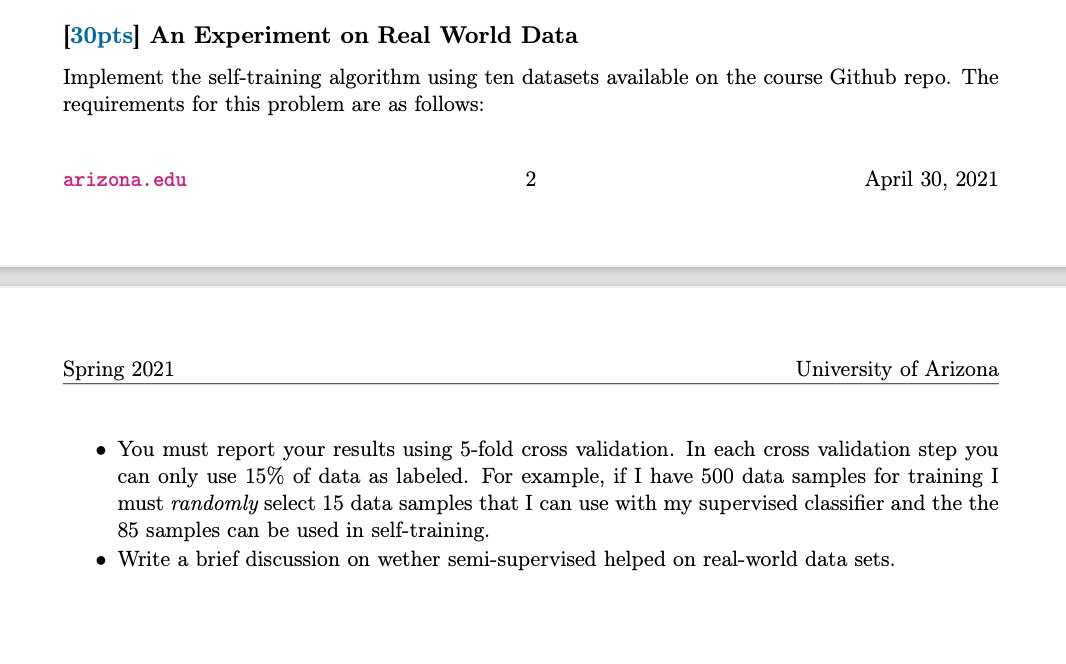

In [ ]:
#Used as reference:
#https://financetrain.com/k-fold-cross-validation-example-python-scikit-learn/

#Used the following 10 datasets from the course Github 
#https://github.com/gditzler/UA-ECE-523-Sp2018/tree/master/data

#Code here shows test on the breast cancer, iris, 
#and wine datasets imported from sklearn, but are are in csv files on github.
#I changed the datasets to test with the following, but not all are included here:
#boston, diabetes, digits, files, ionosphere, zoo, led-display 
#Summary at the end. 

Size of the train dataset from 15%:
(4, 30) (565, 30)
Size of the test dataset from 15%:
(4,) (565,)
Accuracy from 15% validation approach:
36.8141592920354


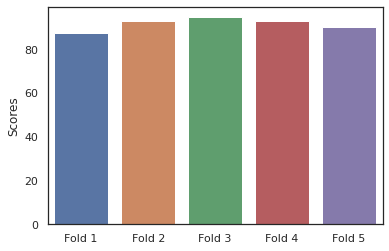

In [ ]:
#importing libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
#breast_cancer dataset 
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

#split data into training and test sets 
train_X, test_X, train_y, test_y = train_test_split(X, binary_encoded_y, random_state=1)

#validation set: using only 15% data as labeled
length_to_split = int(len(features) * 0.15)
# Splitting the X and y into train and test datasets
X_train, X_test = X[:length_to_split], X[length_to_split:]
y_train, y_test = y[:length_to_split], y[length_to_split:]
 
# Print the size of the train and test dataset
print("Size of the train dataset from 15%:")
print(X_train.shape, X_test.shape)
print("Size of the test dataset from 15%:")
print(y_train.shape, y_test.shape)
    
clf = tree.DecisionTreeClassifier(random_state=20)
 
# Create the model on train dataset
model = clf.fit(X_train, y_train)
 
# Calculate the accuracy
print("Accuracy from 15% validation approach:")
print(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

# KFold Cross Validation approach
kf = KFold(n_splits=5,shuffle=False)
kf.split(X)    
     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_model = []
 
# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

# Bar chart displaying accuracy results of each 5 fold invidiually
scores = pd.DataFrame(accuracy_model,columns=['Scores'])
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5'],y="Scores",data=scores)
plt.show()
sns.set()

In [ ]:
#importing libraries
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
#iris dataset 
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

#validation set: using only 15% data as labeled
length_to_split = int(len(features) * 0.15)
# Splitting the X and y into train and test datasets
X_train, X_test = X[:length_to_split], X[length_to_split:]
y_train, y_test = y[:length_to_split], y[length_to_split:]
 
# Print the size of the train and test dataset
print("Size of the train dataset from 15%:")
print(X_train.shape, X_test.shape)
print("Size of the test dataset from 15%:")
print(y_train.shape, y_test.shape)
    
clf = tree.DecisionTreeClassifier(random_state=20)
 
# Create the model on train dataset
model = clf.fit(X_train, y_train)
 
# Calculate the accuracy
print("Accuracy from 15% validation approach:")
print(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

# KFold Cross Validation approach
kf = KFold(n_splits=5,shuffle=False)
kf.split(X)    
     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_model = []
 
# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)


Size of the train dataset from 15%:
(4, 4) (146, 4)
Size of the test dataset from 15%:
(4,) (146,)
Accuracy from 15% validation approach:
31.506849315068493


In [ ]:
#importing libraries
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
#wine dataset 
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

#validation set: using only 15% data as labeled
length_to_split = int(len(features) * 0.15)
# Splitting the X and y into train and test datasets
X_train, X_test = X[:length_to_split], X[length_to_split:]
y_train, y_test = y[:length_to_split], y[length_to_split:]
 
# Print the size of the train and test dataset
print("Size of the train dataset from 15%:")
print(X_train.shape, X_test.shape)
print("Size of the test dataset from 15%:")
print(y_train.shape, y_test.shape)
    
clf = tree.DecisionTreeClassifier(random_state=20)
 
# Create the model on train dataset
model = clf.fit(X_train, y_train)
 
# Calculate the accuracy
print("Accuracy from 15% validation approach:")
print(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

# KFold Cross Validation approach
kf = KFold(n_splits=5,shuffle=False)
kf.split(X)    
     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_model = []
 
# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

Size of the train dataset from 15%:
(4, 13) (174, 13)
Size of the test dataset from 15%:
(4,) (174,)
Accuracy from 15% validation approach:
31.60919540229885


Using 15% of the labeled dated resulted in low accuracy. However, k-fold validation is advantageous compared to just splitting the data. The size (Value 1, Value2) represent (number of observations, number of features) on the dataset. With more samples in the dataset, we can see there is a larger accuracy. Semi-supervised method helps with real world data because getting labeled data can be more time consuming and expensive. By pretraining 15% of the labeled data, we are able to get an idea of how accurate we can train the entire dataset. 